In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
upload_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_eval.csv'
upload = pd.read_csv(upload_csv_path)
upload['remain_upload_time'] = upload['upload_time'] - upload['obfuscation_time'] - upload['generate_fake_rows_time']-upload["db_query_time"]-upload["db_write_time"]
upload['total_rows'] = upload['data_per_true']*upload['real_data_rows']
print(upload)
upload_bar = upload[['generate_fake_rows_time','obfuscation_time','db_query_time','db_write_time','remain_upload_time','total_rows']]
upload_bar = upload_bar.sort_values(by=['total_rows'])


     data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0               10            8000           72000                 4.366713   
1               10              50             450                 0.066085   
2               10             100             900                 0.094467   
3               10             500            4500                 0.318248   
4               10            5000           45000                 2.713437   
..             ...             ...             ...                      ...   
273            300               1             299                 0.055651   
274            300              10            2990                 0.200515   
275            300             100           29900                 1.663005   
276            300            1000          299000                16.169494   
277            300           10000         2990000               162.634074   

     obfuscation_time  numbers_of_real_data_in_db_b

<Axes: ylabel='total_rows'>

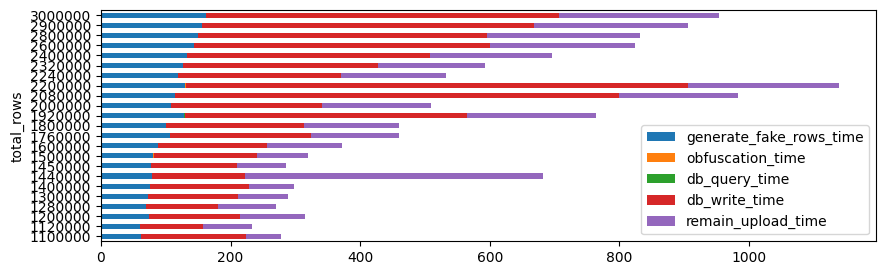

In [3]:
bigger_part = upload_bar.loc[upload_bar['total_rows'] > 1000000]
bigger_part = bigger_part.groupby('total_rows').mean()
bigger_part.plot.barh(stacked=True,figsize=(10,3))

## All plots

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


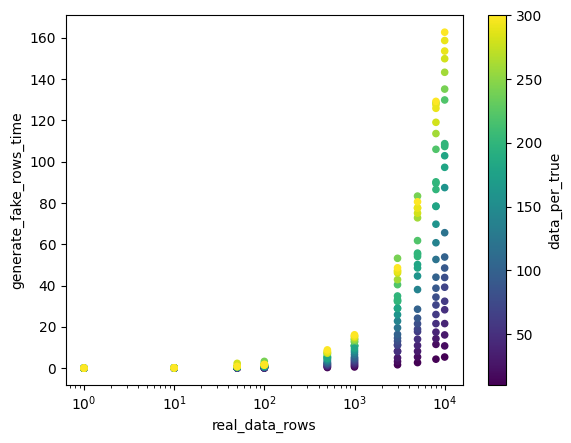

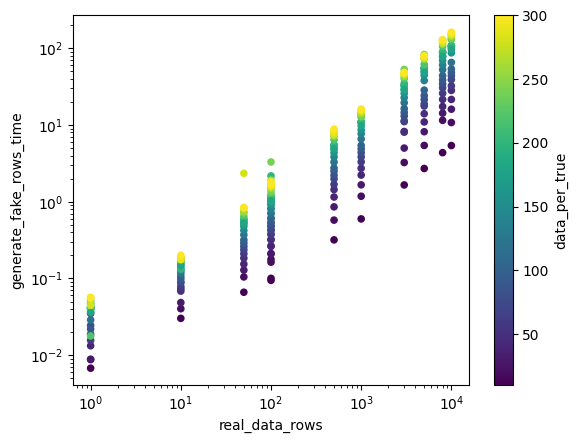

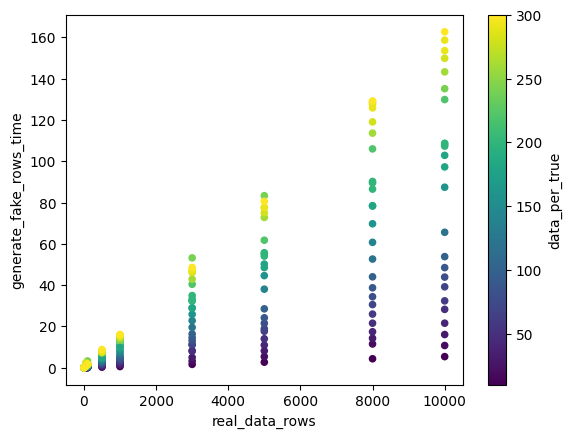

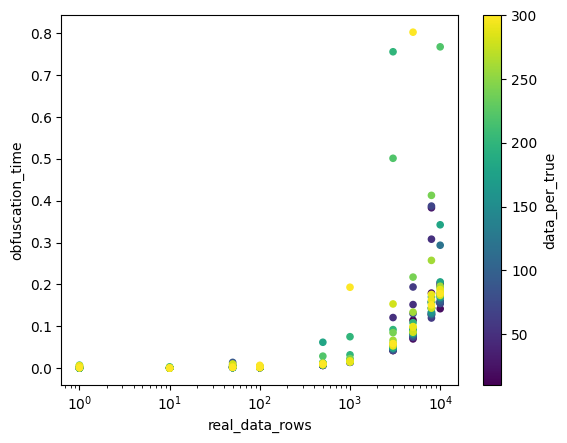

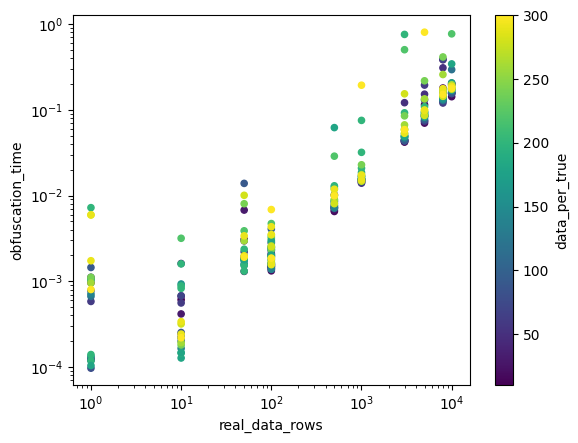

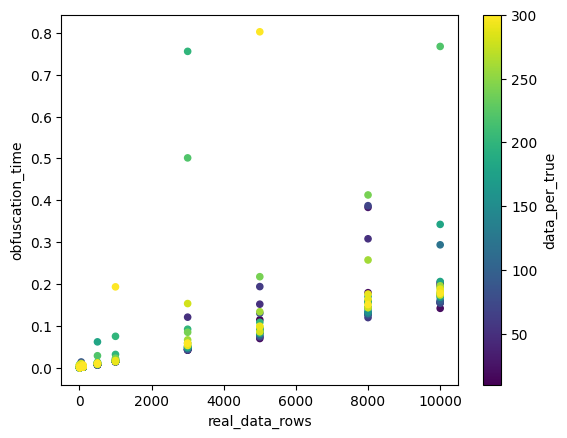

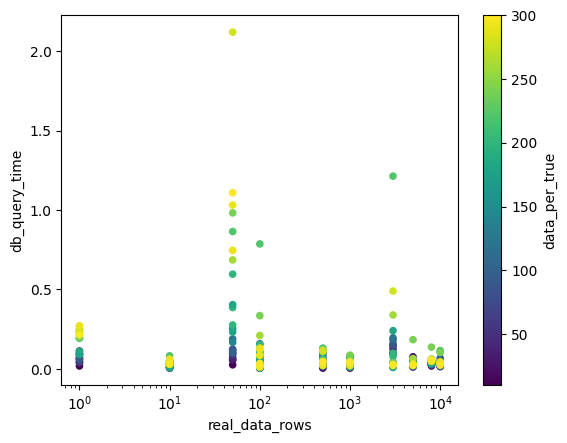

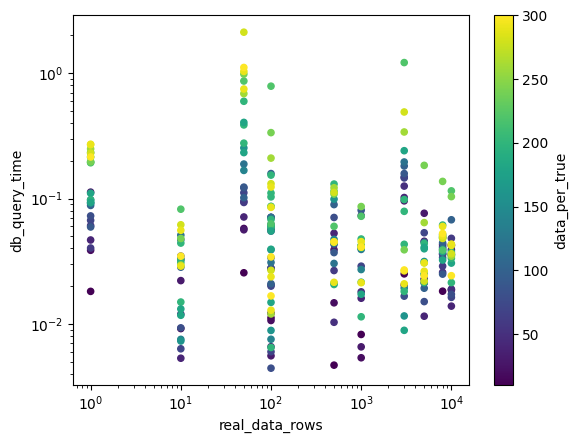

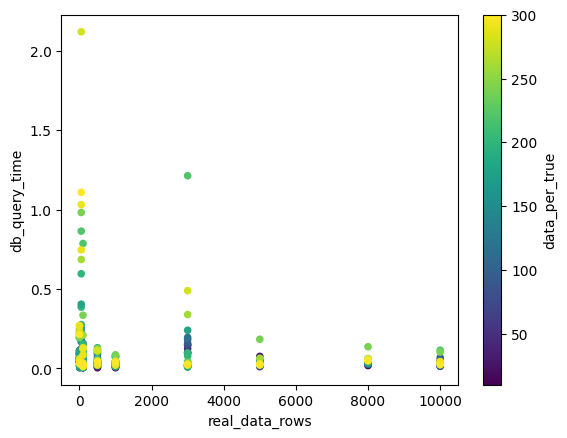

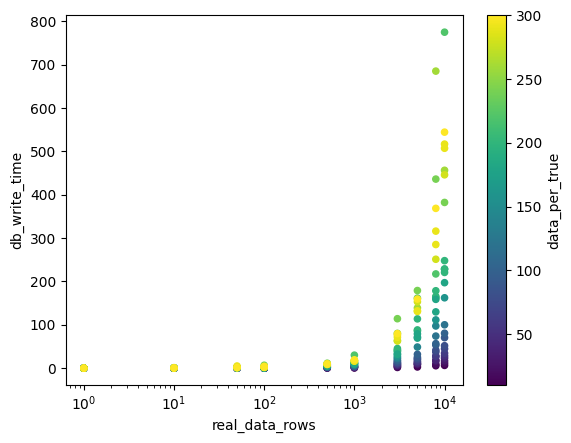

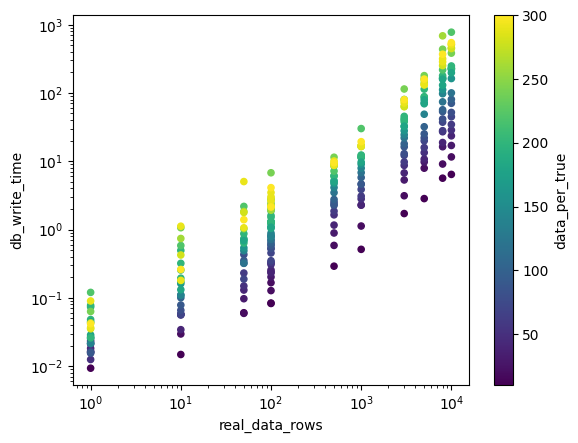

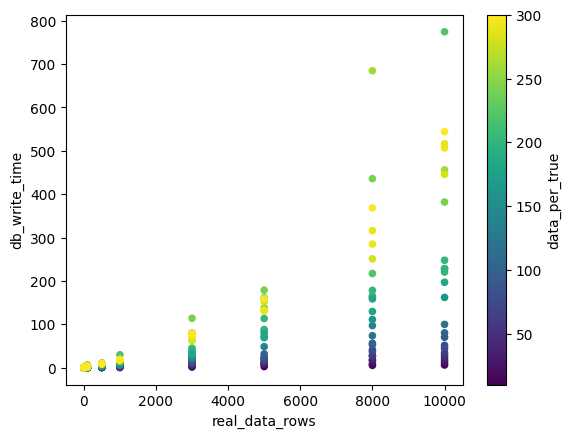

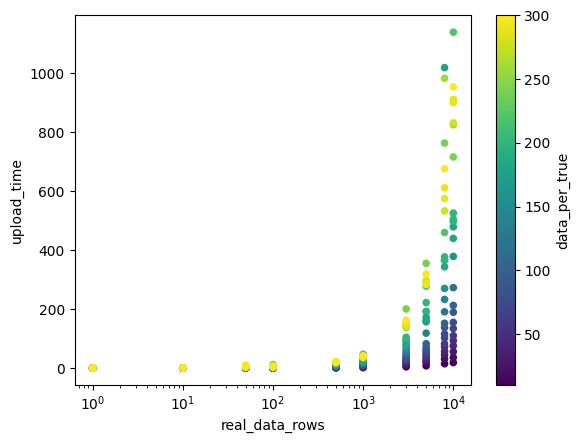

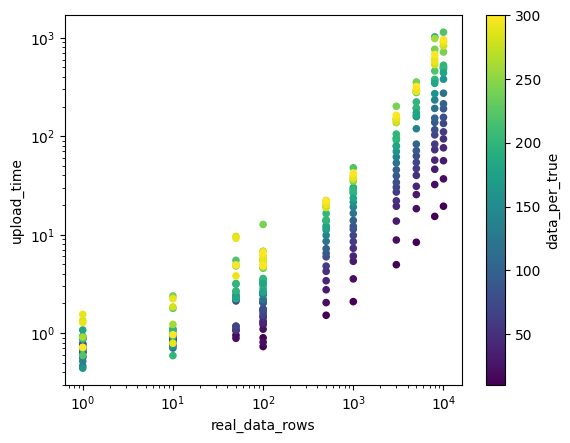

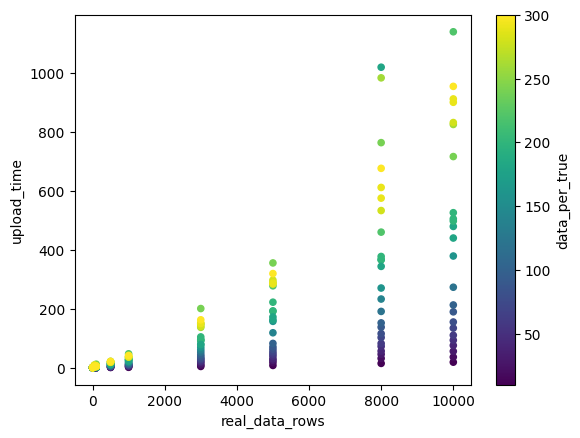

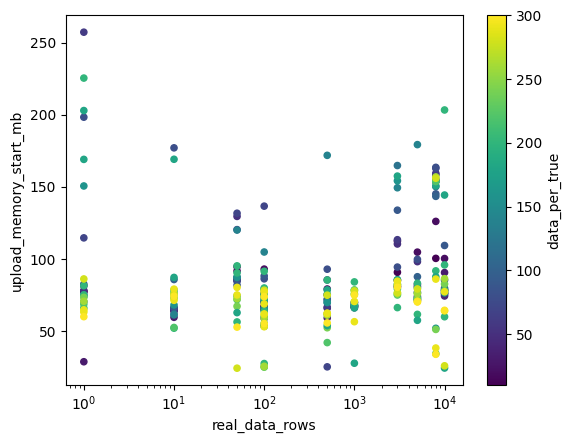

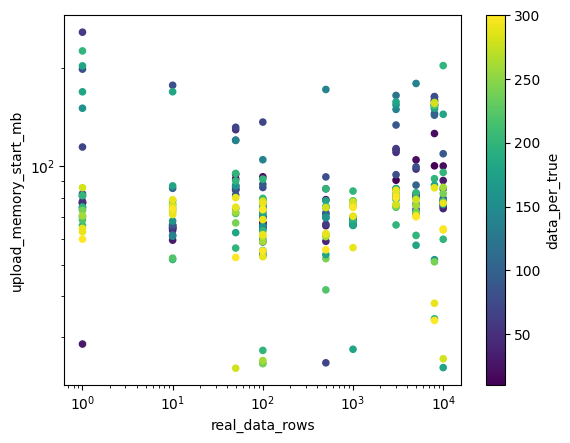

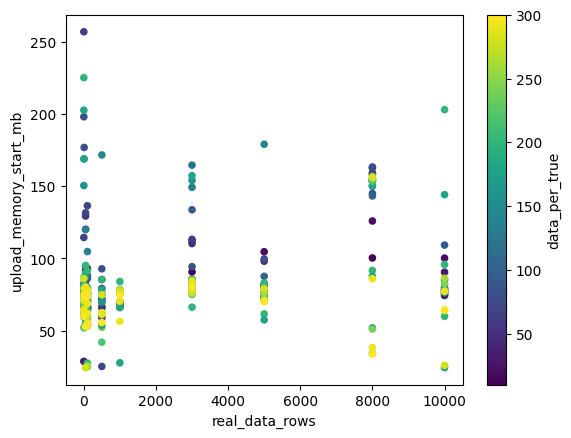

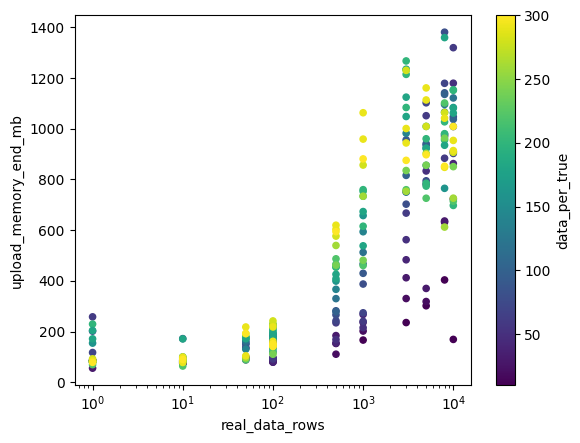

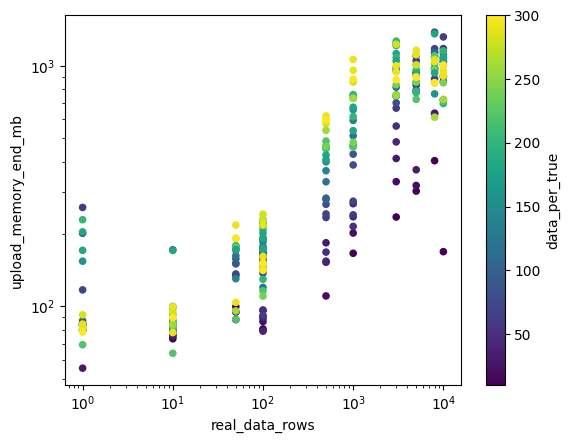

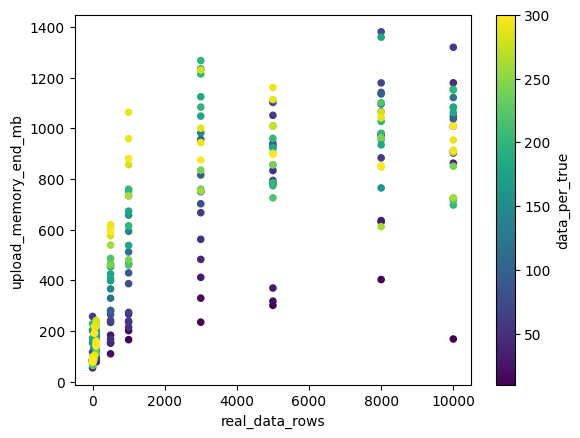

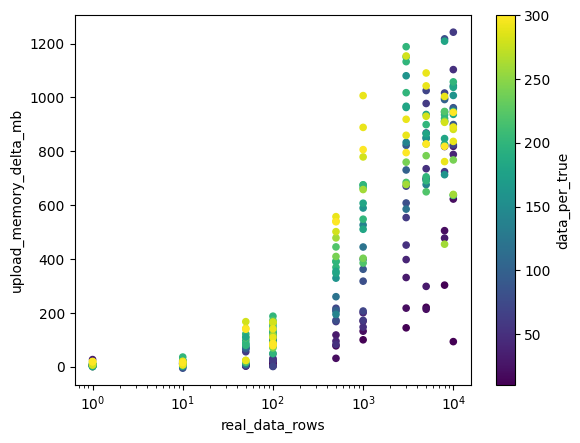

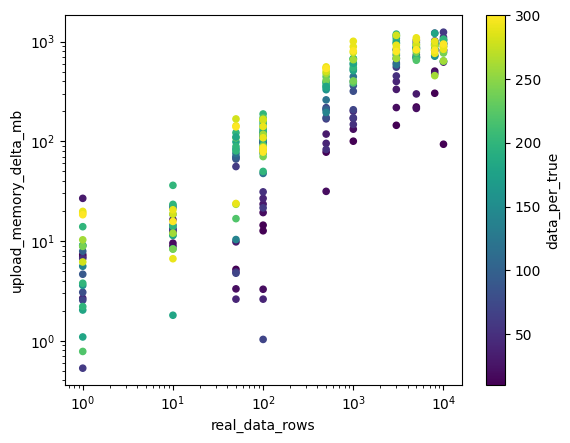

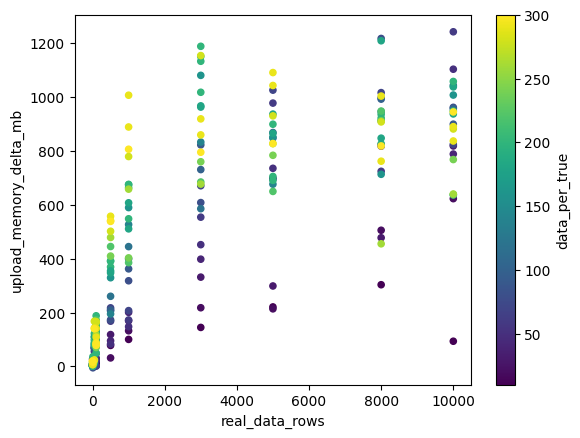

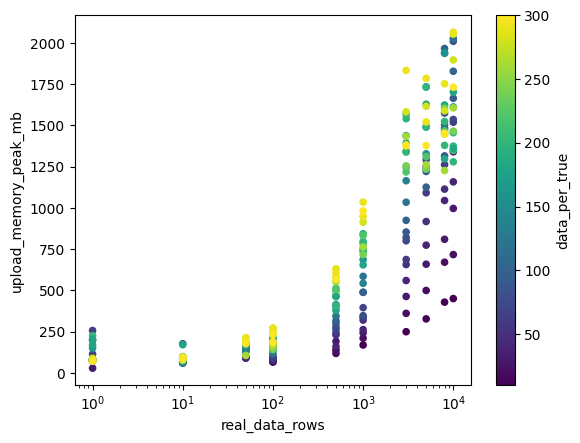

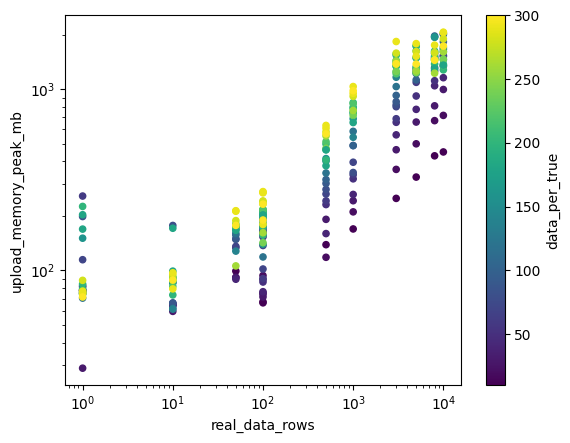

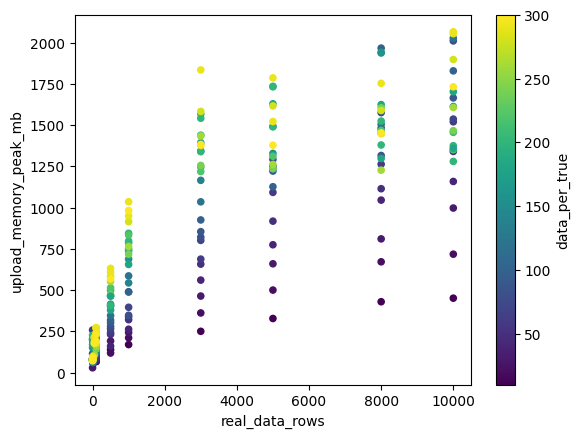

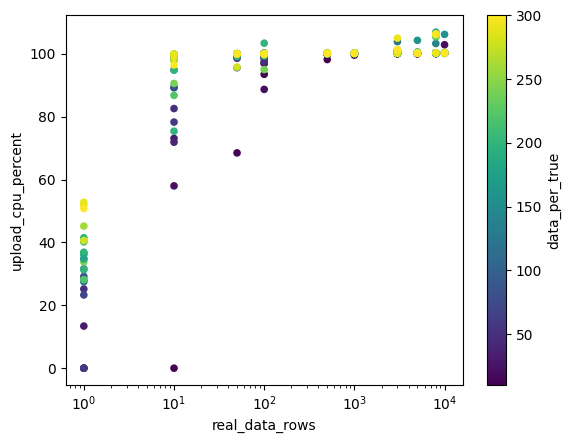

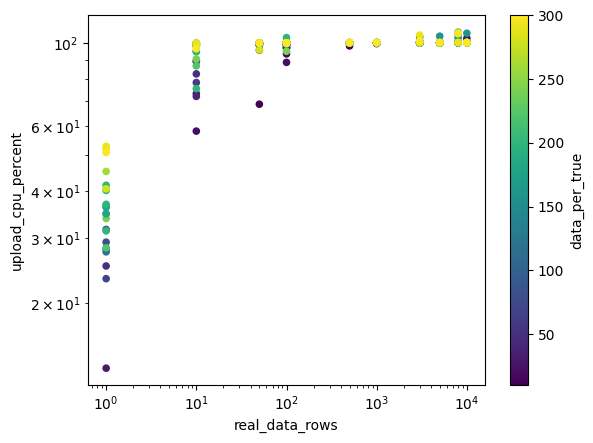

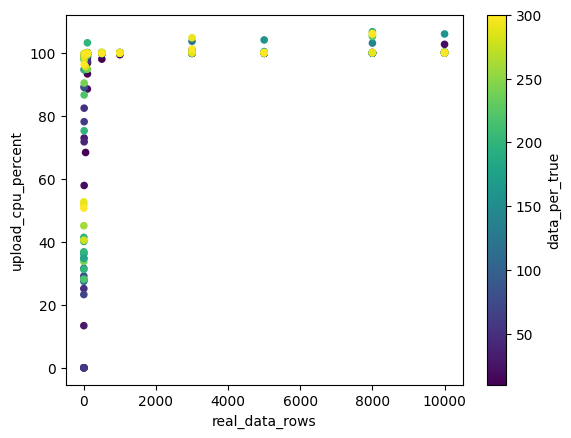

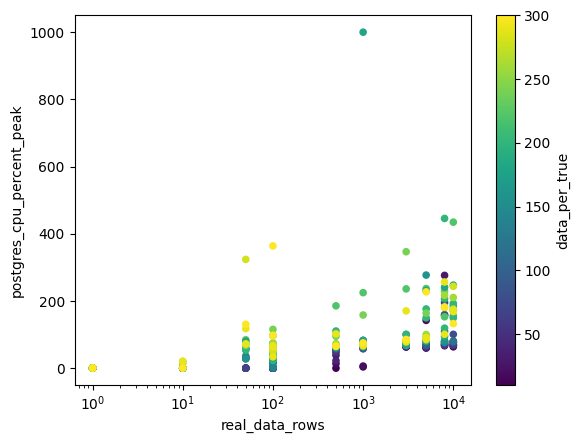

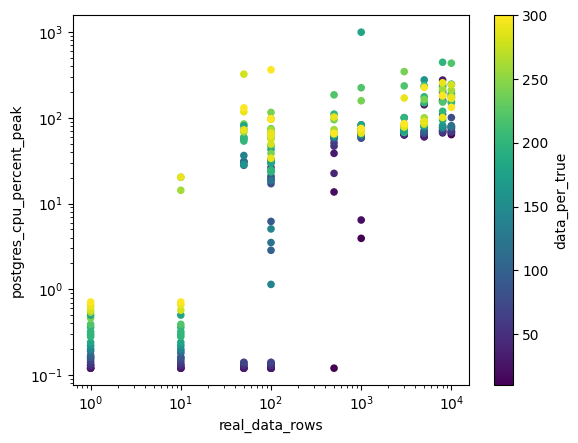

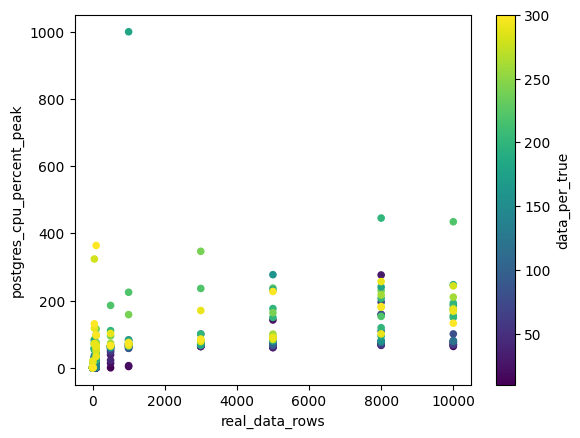

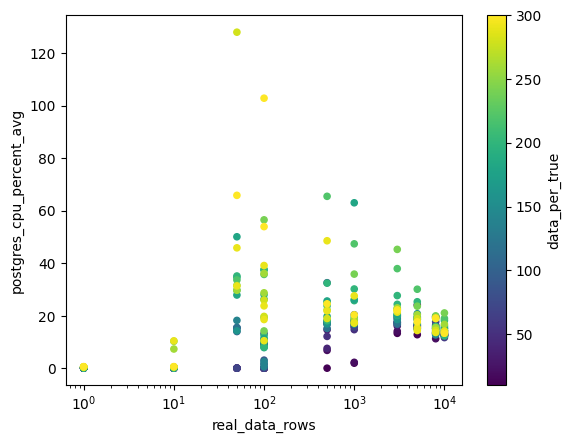

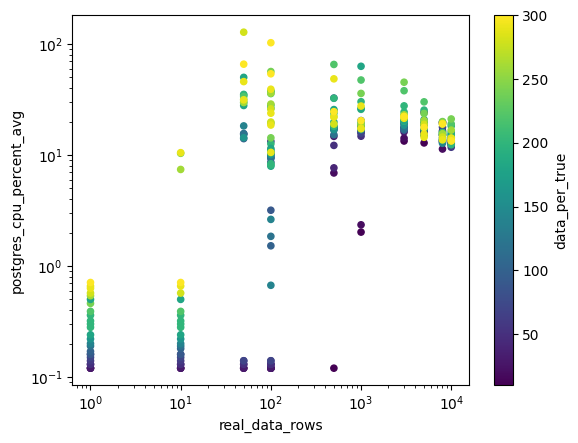

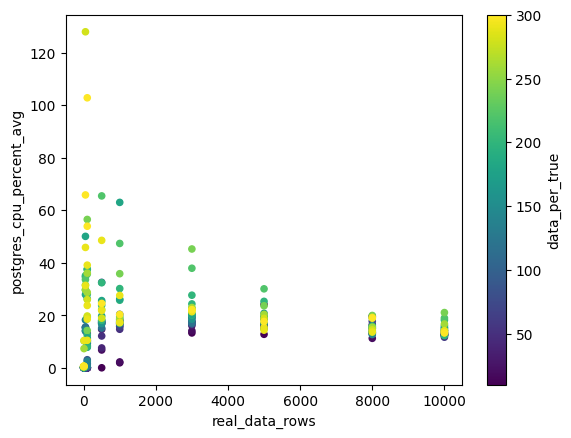

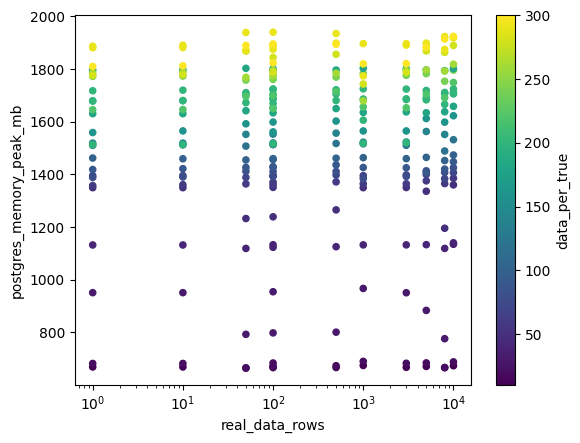

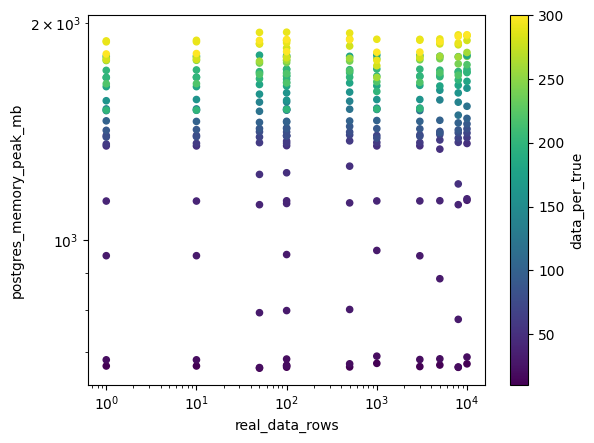

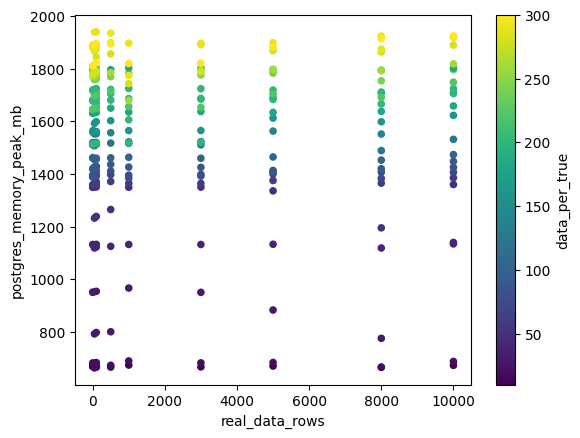

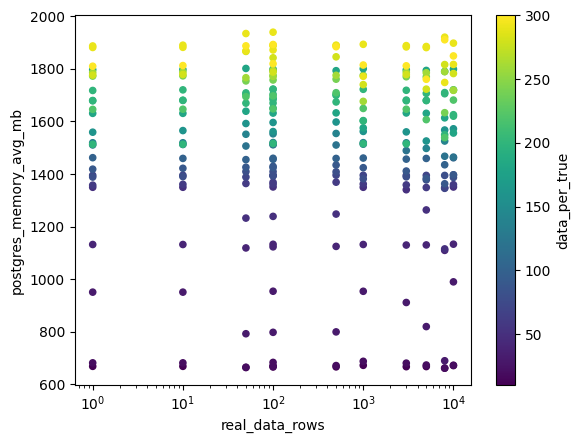

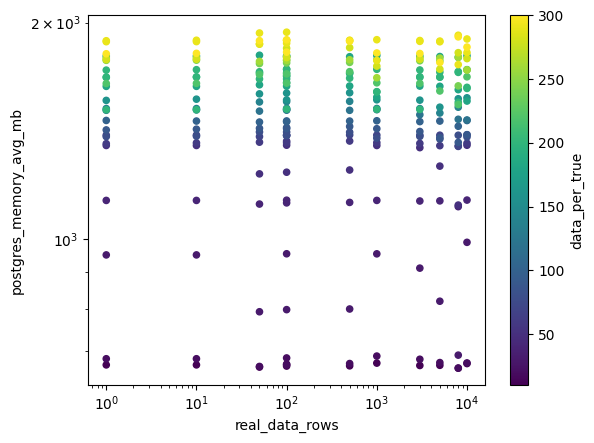

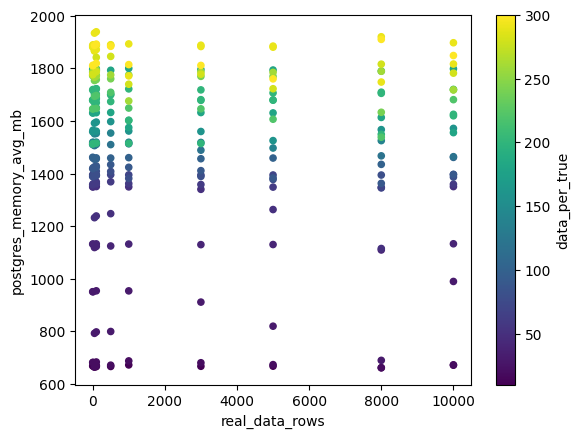

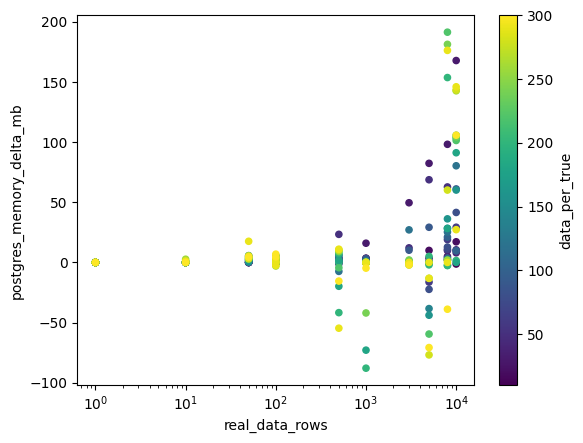

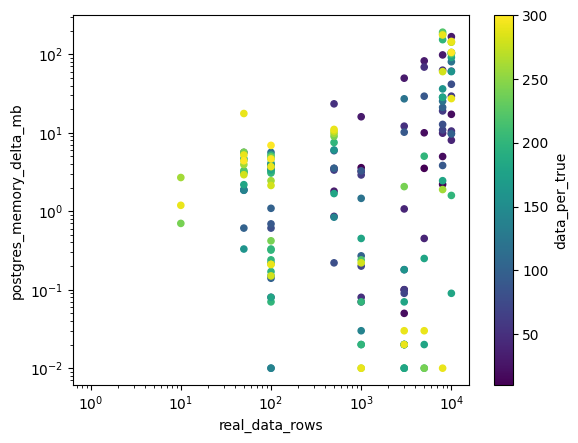

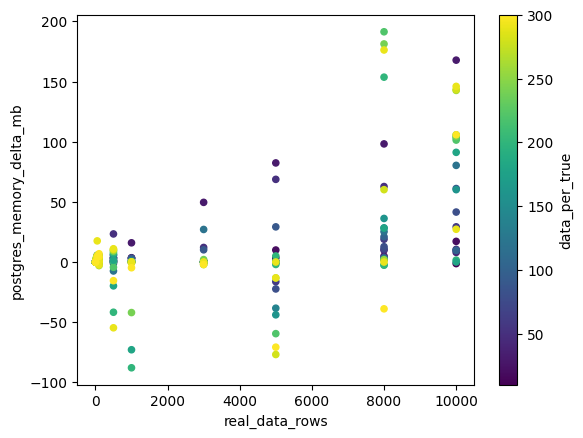

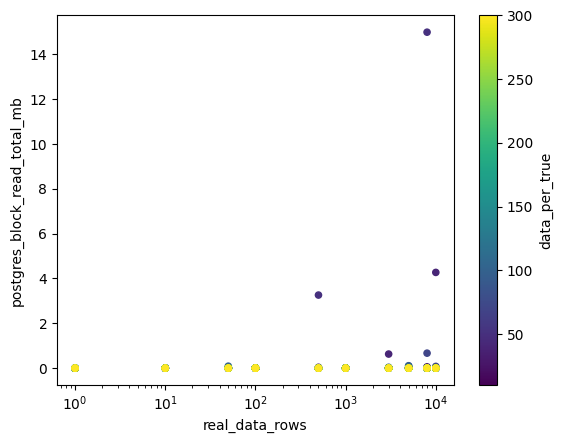

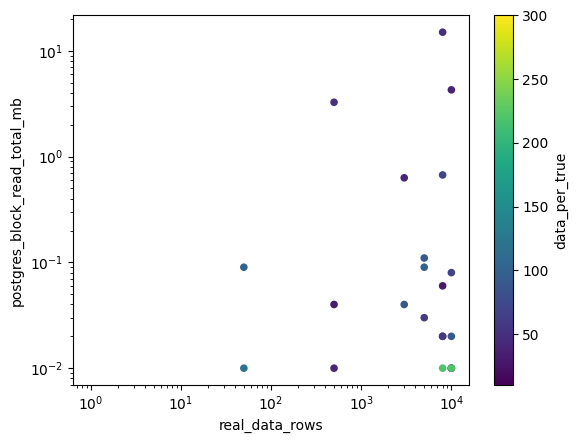

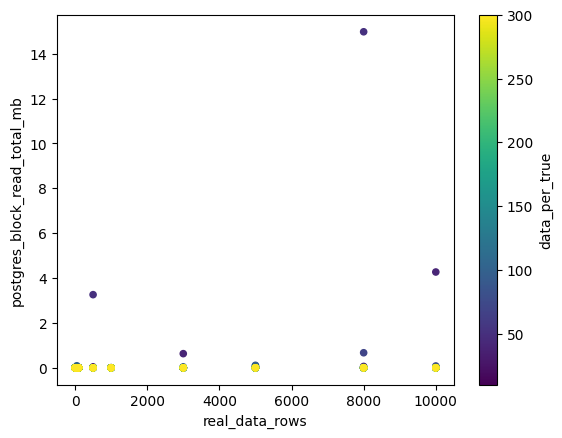

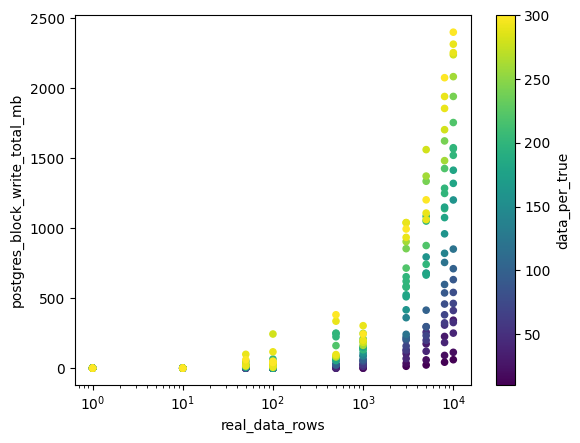

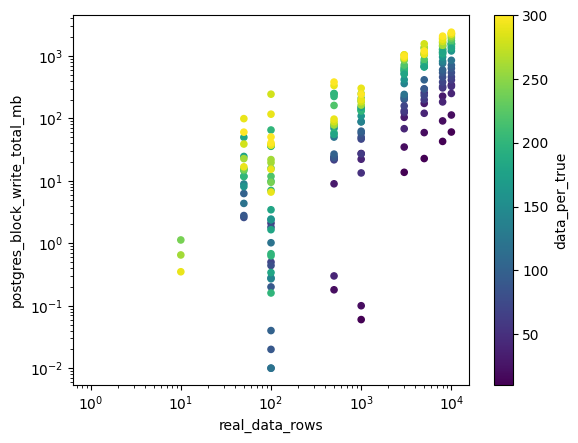

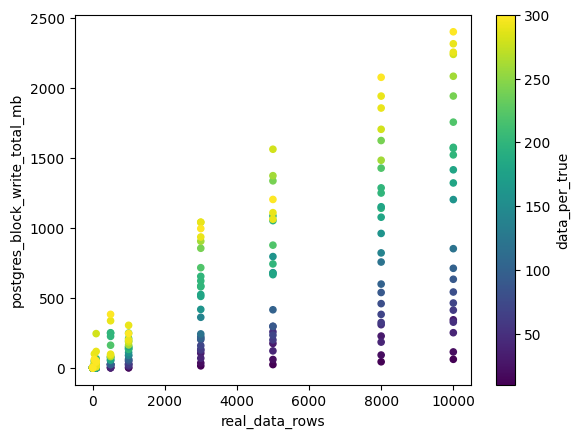

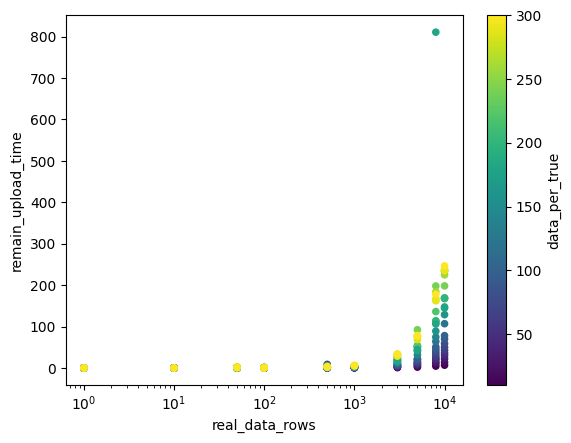

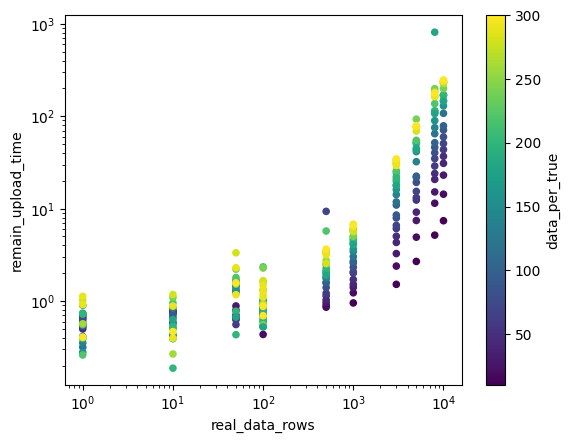

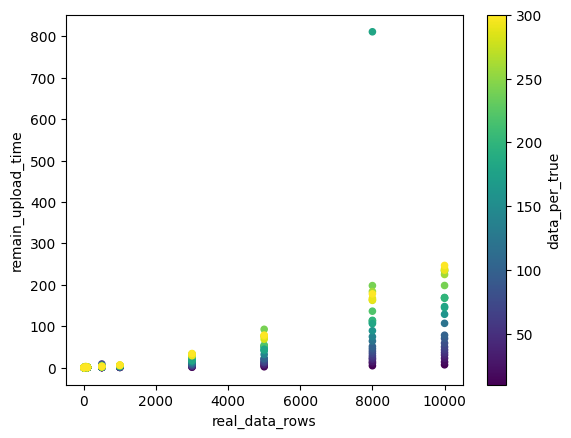

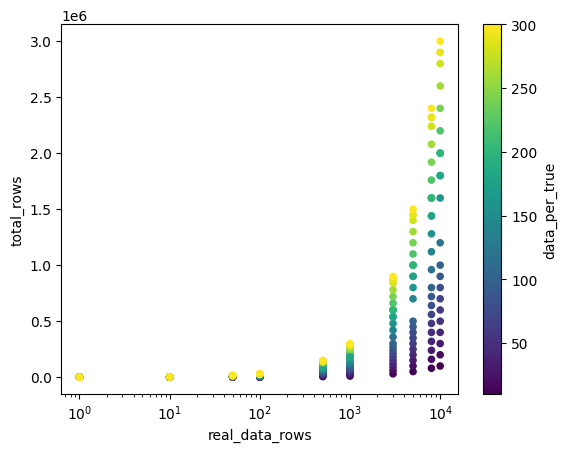

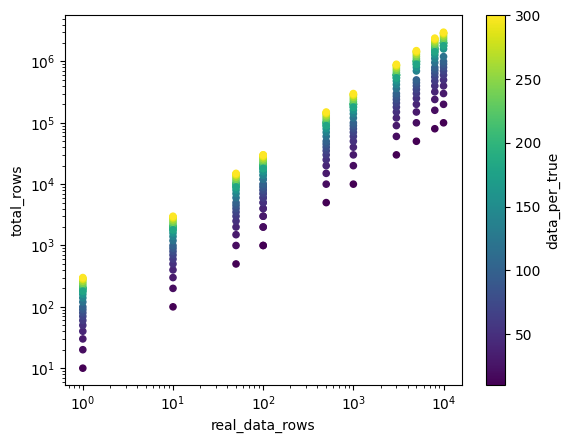

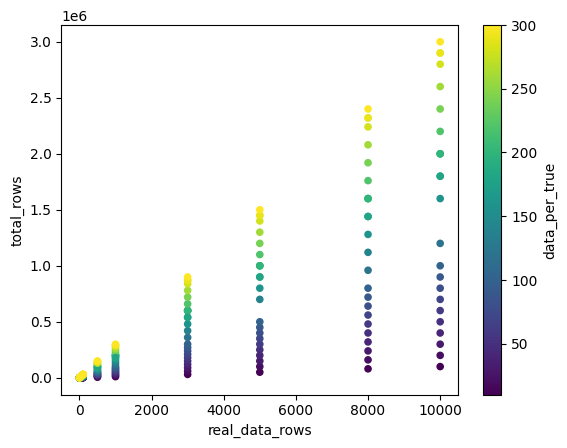

In [4]:
unused_col = ['data_per_true', 'real_data_rows', 'fake_data_rows',"numbers_of_real_data_in_db_before_upload"]
for i, col in enumerate(upload.columns):
    if col in unused_col:
        continue
    ax = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax.set_xscale('log')
    ax1 = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2 = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')

# subplots

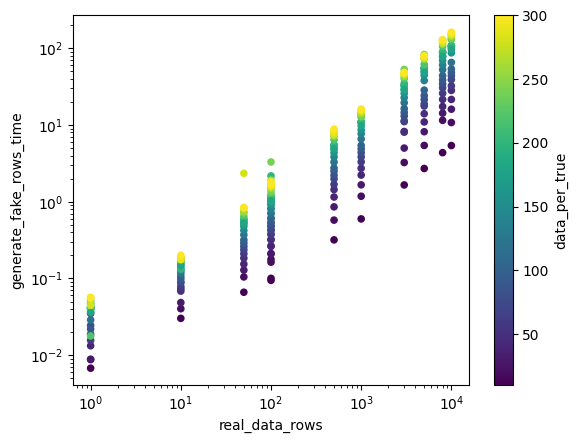

In [5]:
ax = upload.plot.scatter(x='real_data_rows', y='generate_fake_rows_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')

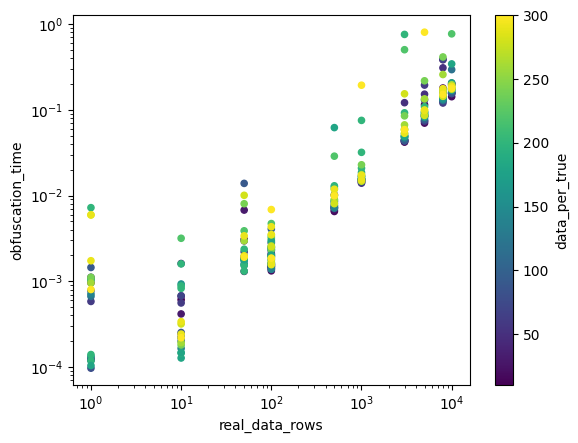

In [6]:
ax = upload.plot.scatter(x='real_data_rows', y='obfuscation_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')

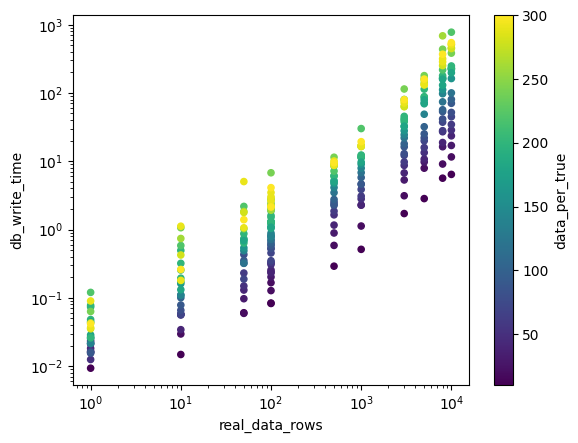

In [7]:
ax = upload.plot.scatter(x='real_data_rows', y='db_write_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')

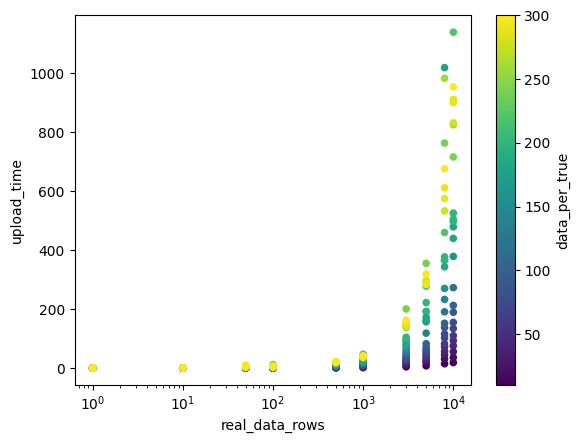

In [24]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

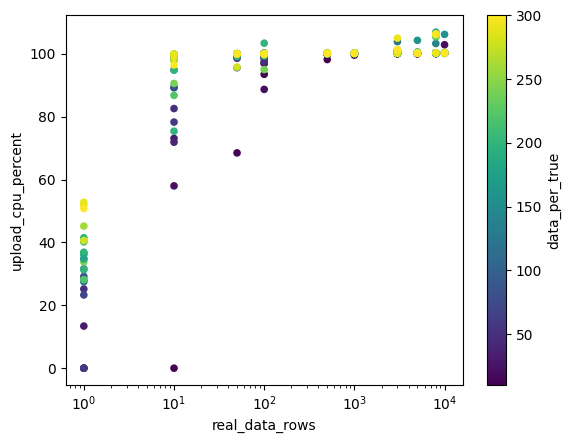

In [9]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_cpu_percent',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

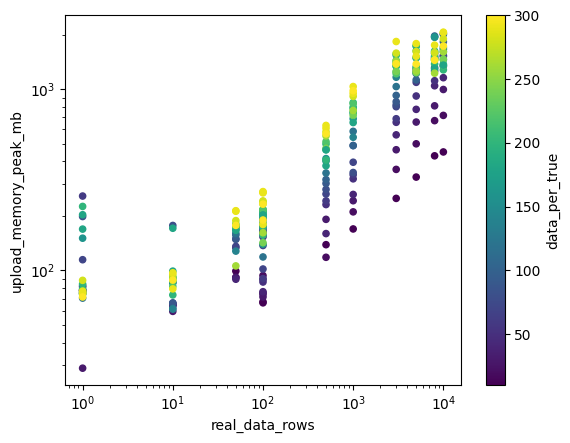

In [10]:
ax = upload.plot.scatter(x='real_data_rows', y='upload_memory_peak_mb',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')

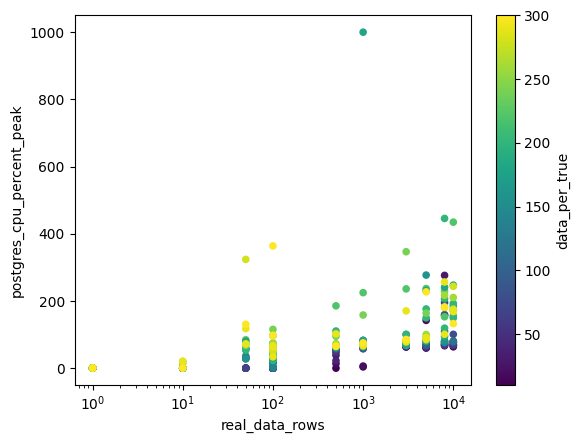

In [11]:
ax = upload.plot.scatter(x='real_data_rows', y='postgres_cpu_percent_peak',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

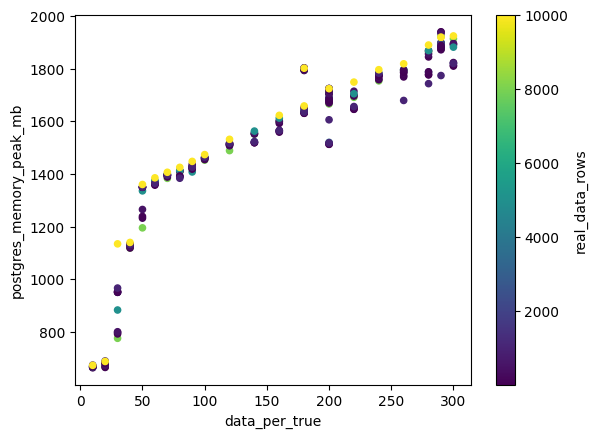

In [12]:
ax = upload.plot.scatter(x='data_per_true', y='postgres_memory_peak_mb',c='real_data_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')

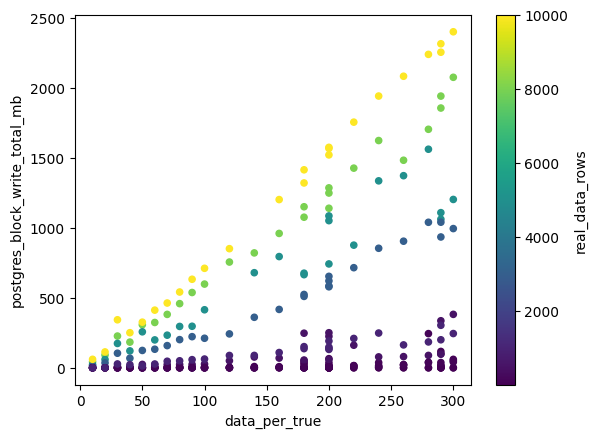

In [13]:
ax = upload.plot.scatter(x='data_per_true', y='postgres_block_write_total_mb',c='real_data_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')

In [14]:
read_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_eval.csv'
read = pd.read_csv(read_csv_path)
read["remain_read_time"] = read["read_real_data_time"] - read["deobfuscation_time"] - read["db_query_time"]
print(read)
read_bar = read[['deobfuscation_time','db_query_time','remain_read_time','total_read_rows']]
read_bar = read_bar.sort_values(by=['total_read_rows'])

     read_real_data_time  db_query_time  deobfuscation_time  \
0               0.233585       0.106801            0.039732   
1               0.040153       0.014688            0.000722   
2               0.047483       0.013554            0.001269   
3               0.064990       0.029876            0.006654   
4               0.159558       0.098643            0.031421   
..                   ...            ...                 ...   
270             0.099850       0.007816            0.000130   
271             0.083532       0.005762            0.000186   
272             0.052428       0.018143            0.001680   
273             0.182515       0.030172            0.007950   
274             4.641608       4.430280            0.039443   

     numbers_of_real_data_in_db_before_read  total_read_rows  data_per_true  \
0                                      8000             8000             10   
1                                        50               50             10   
2     

<Axes: ylabel='total_read_rows'>

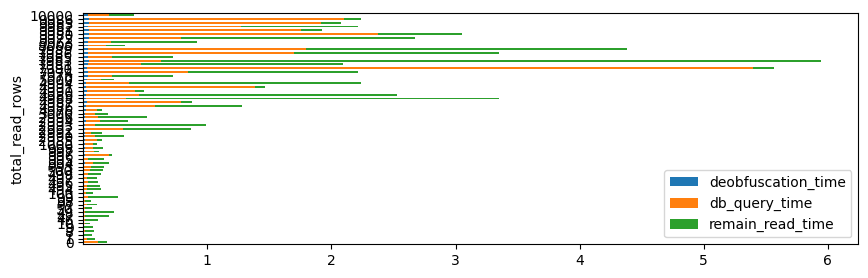

In [15]:
read_bar = read_bar.groupby('total_read_rows').mean()
read_bar.plot.barh(stacked=True,figsize=(10,3))

# All plots

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


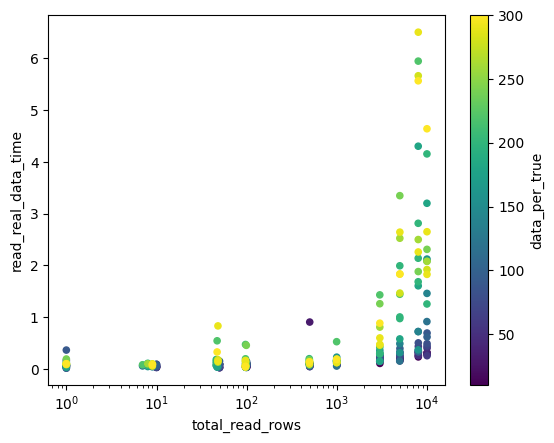

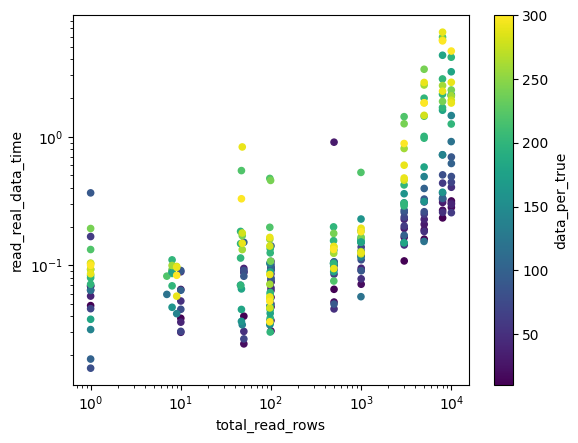

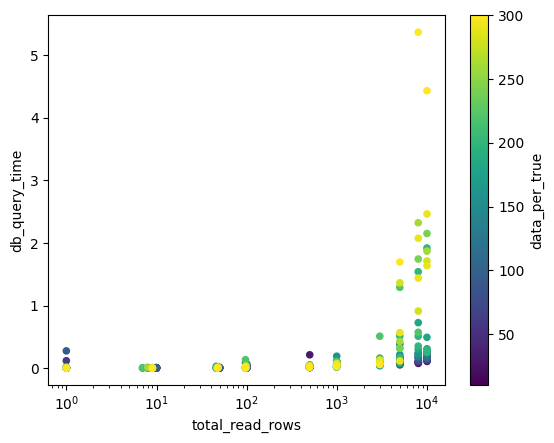

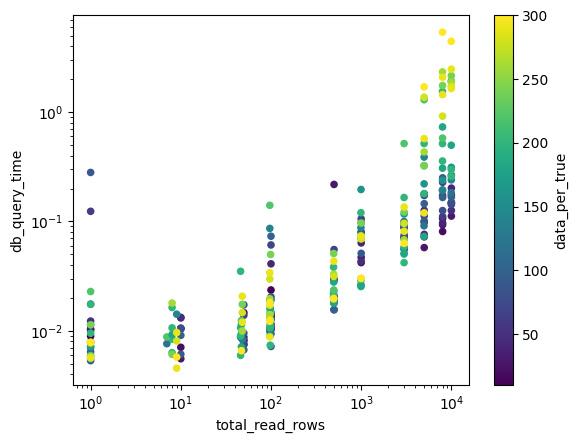

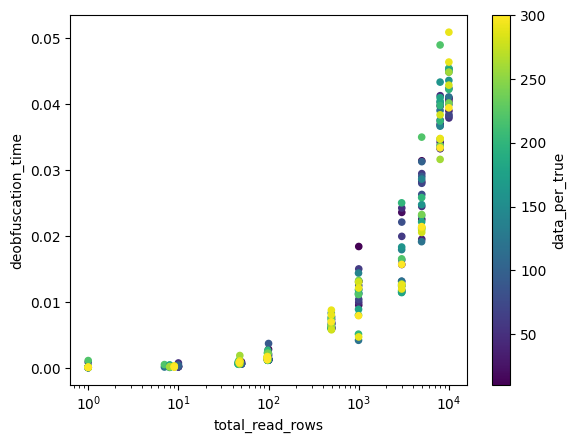

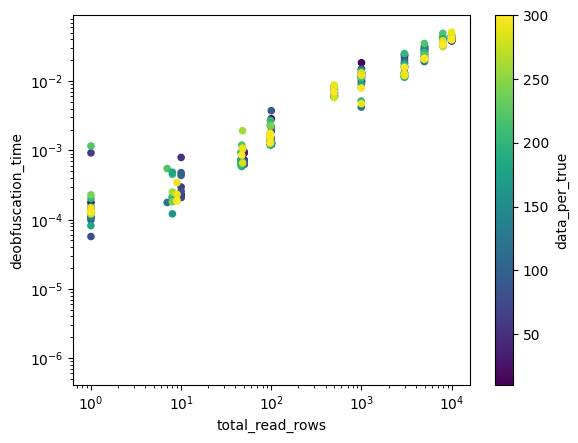

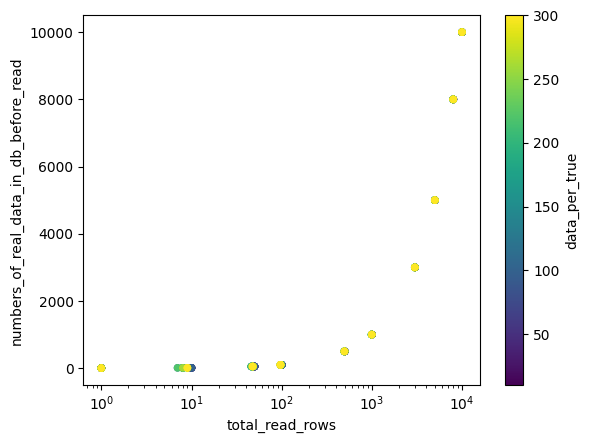

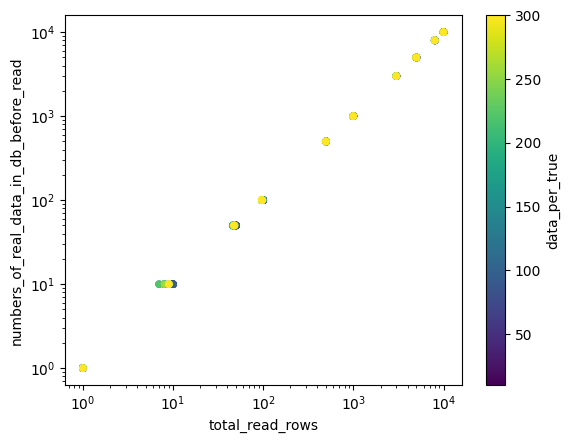

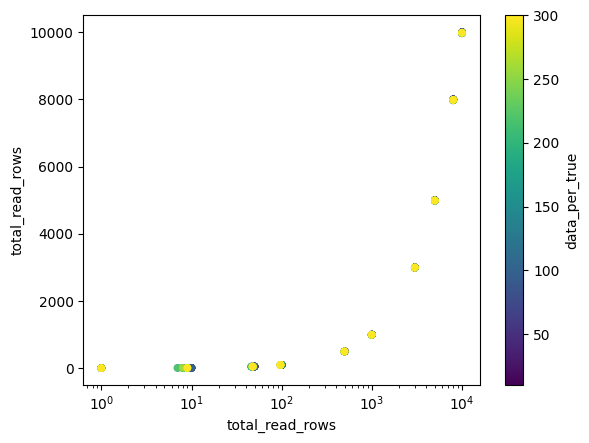

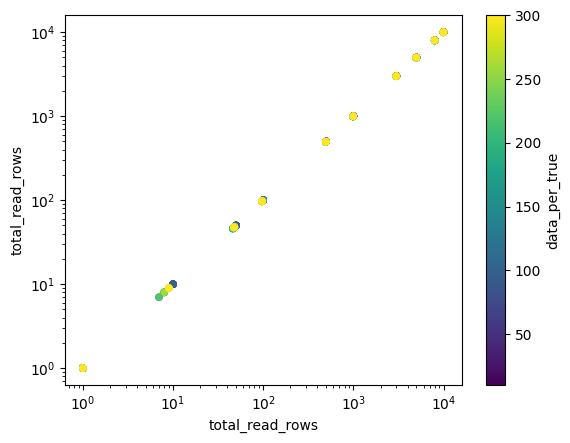

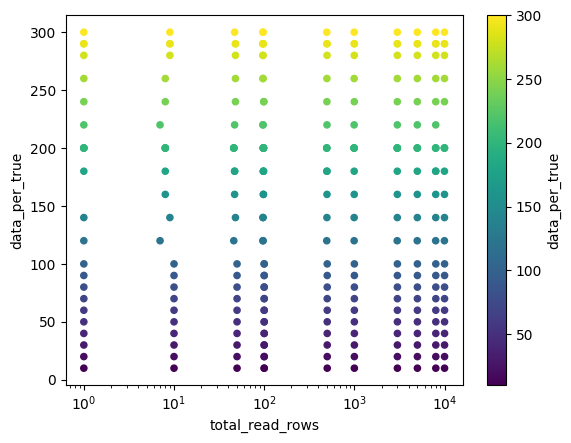

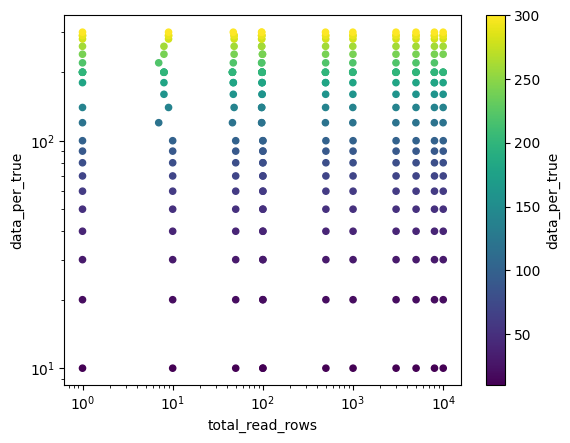

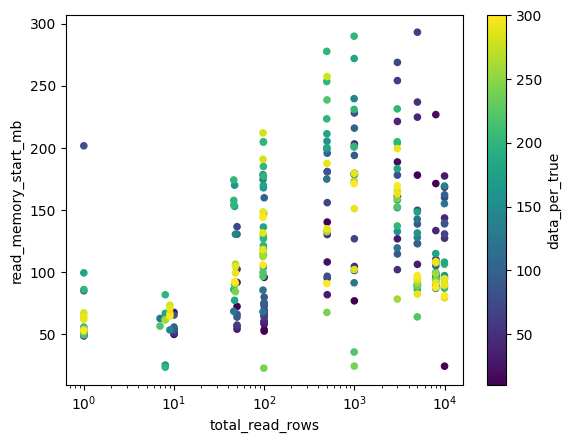

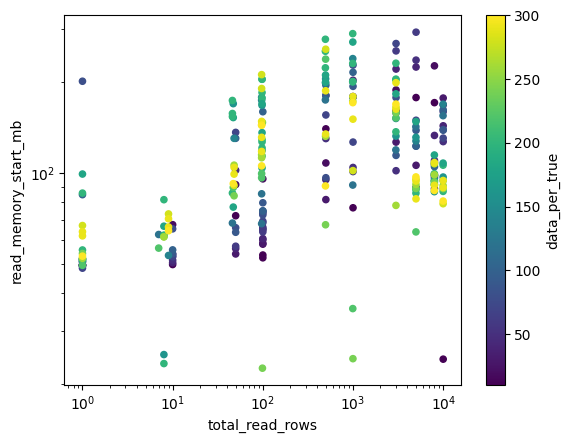

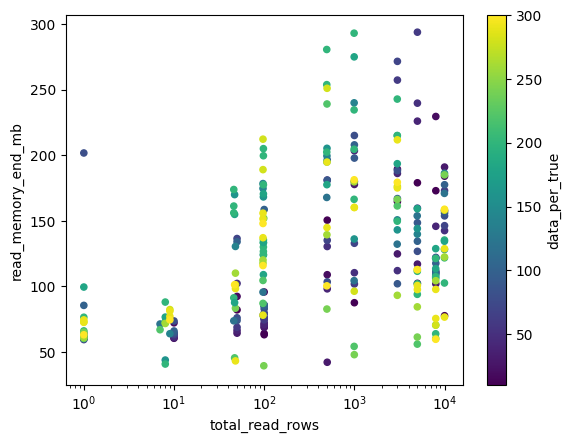

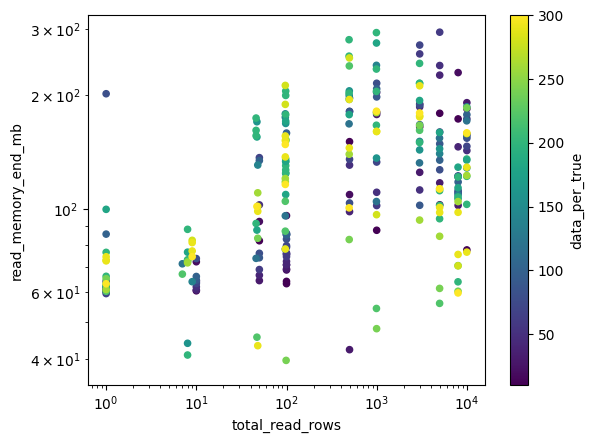

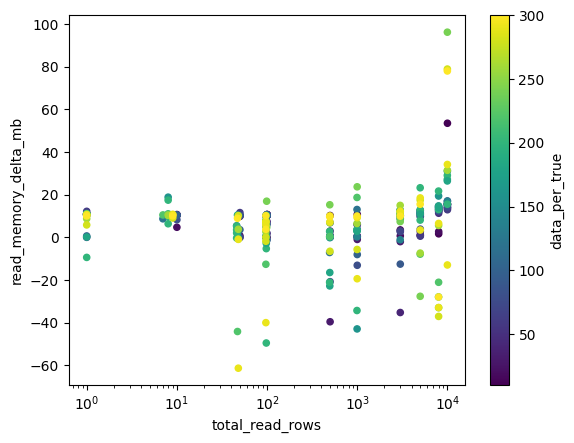

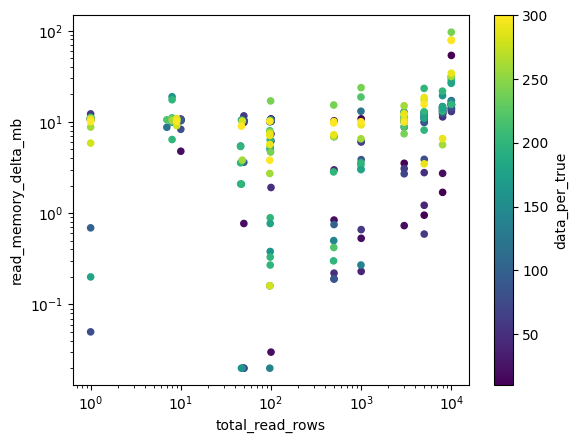

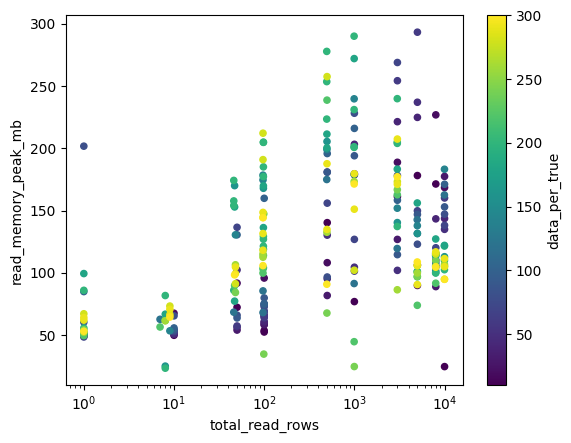

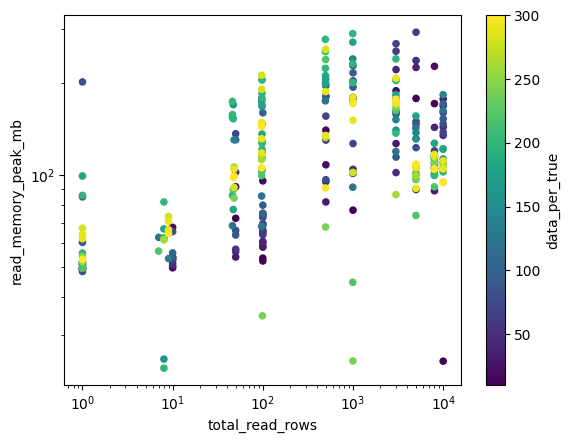

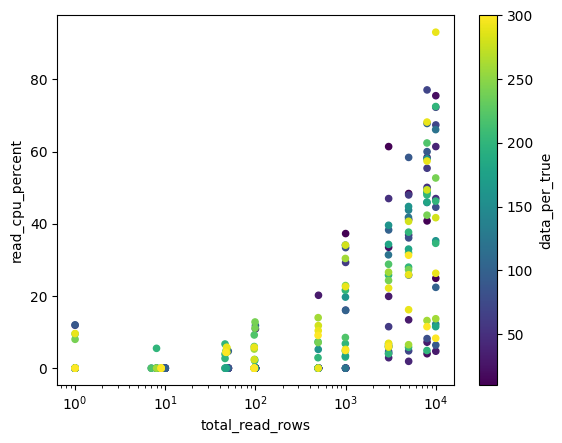

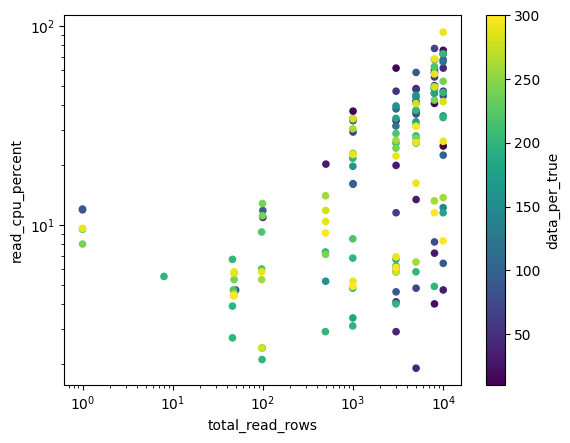

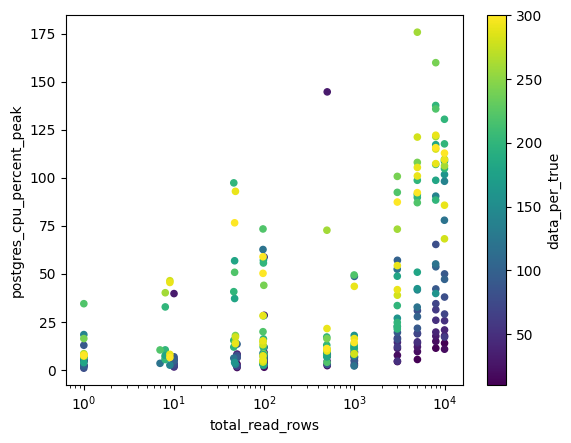

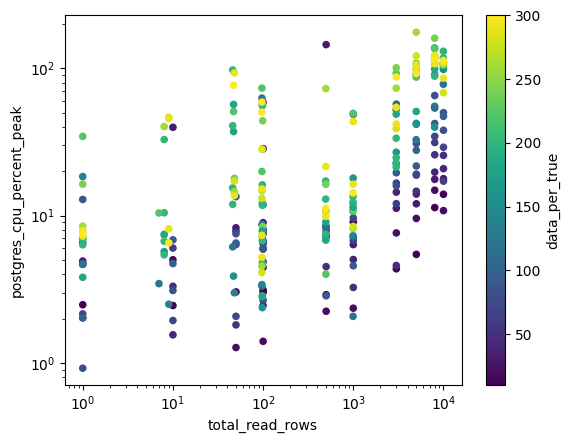

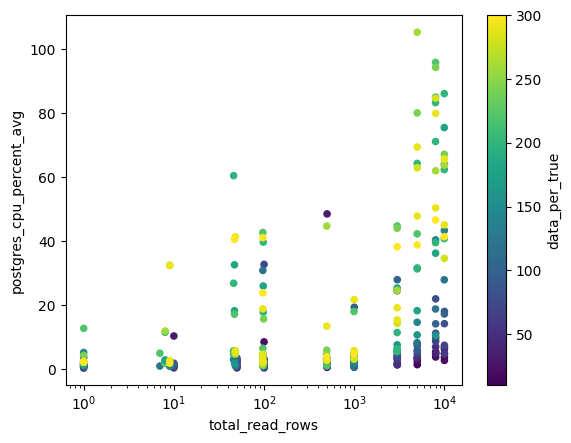

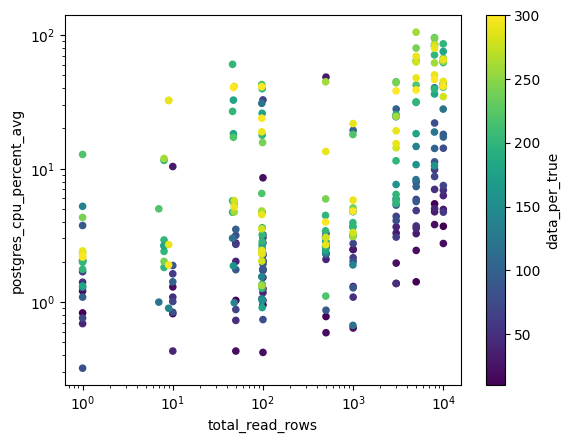

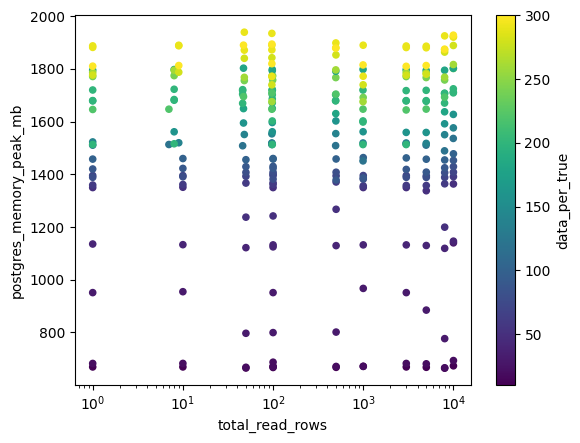

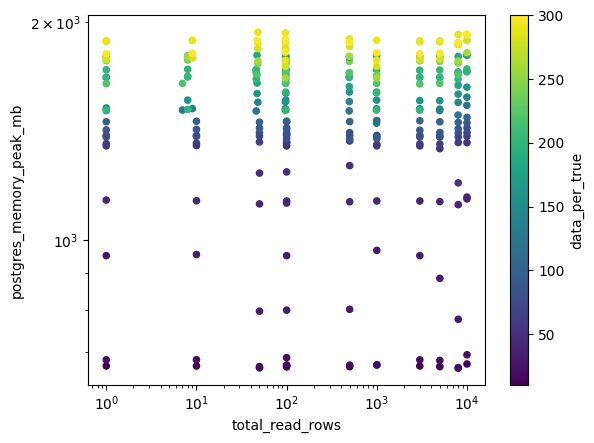

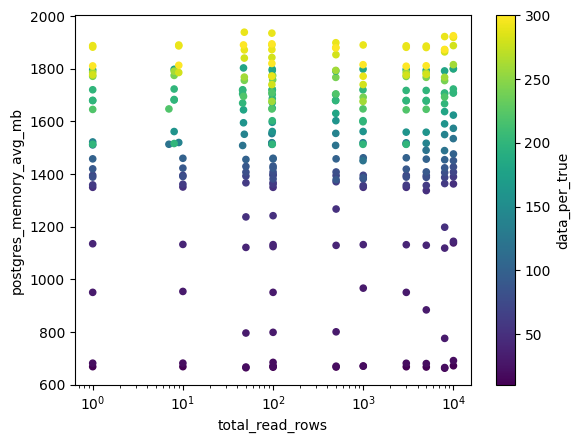

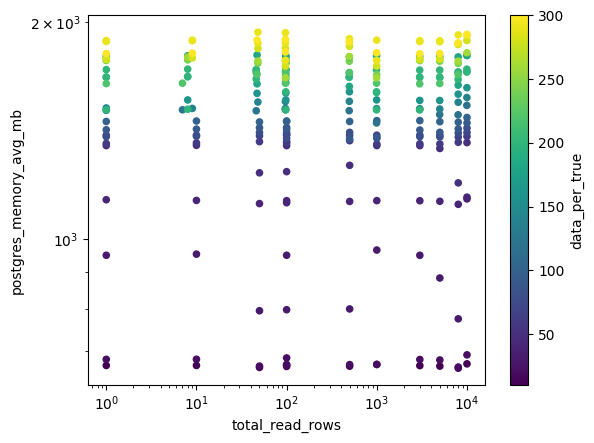

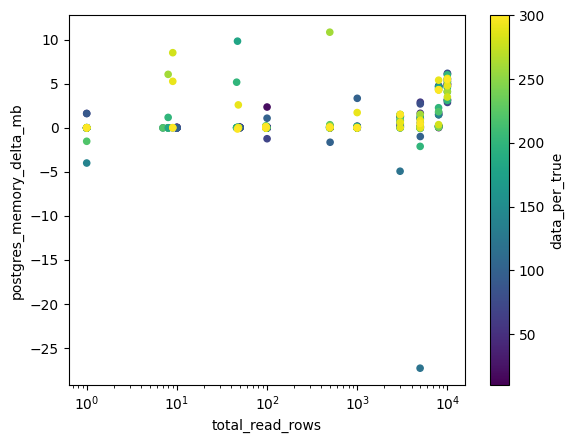

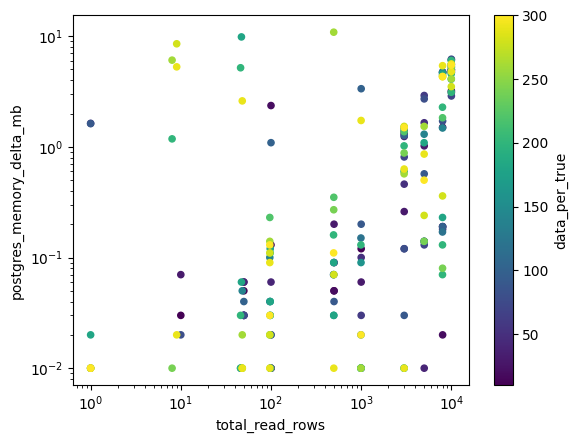

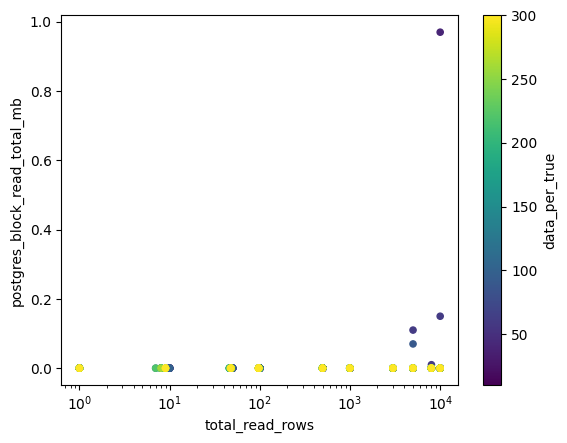

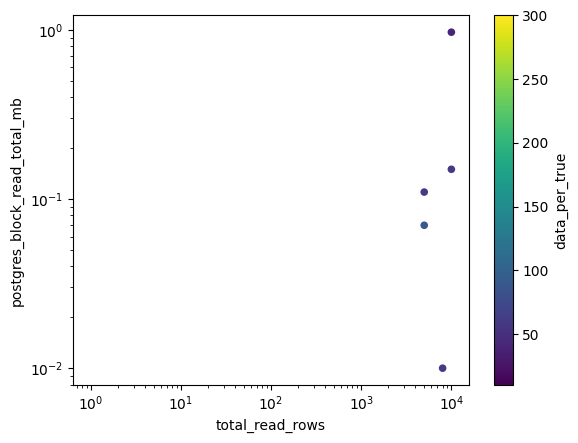

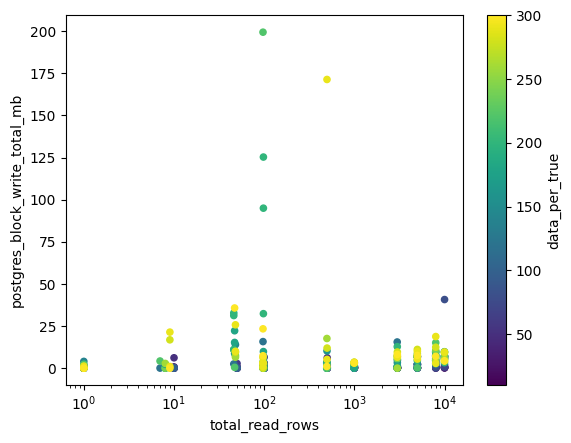

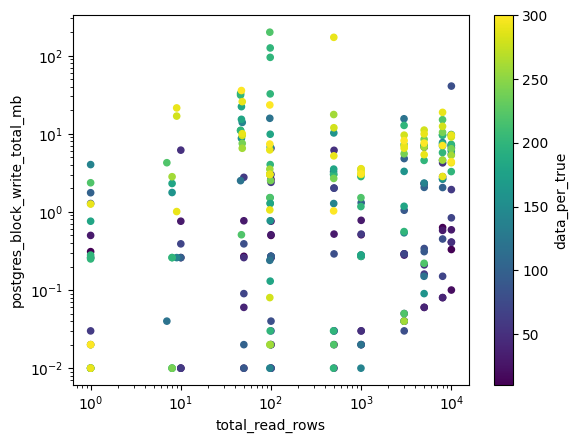

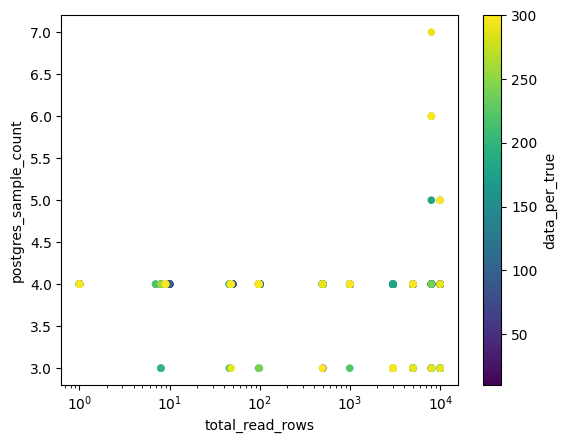

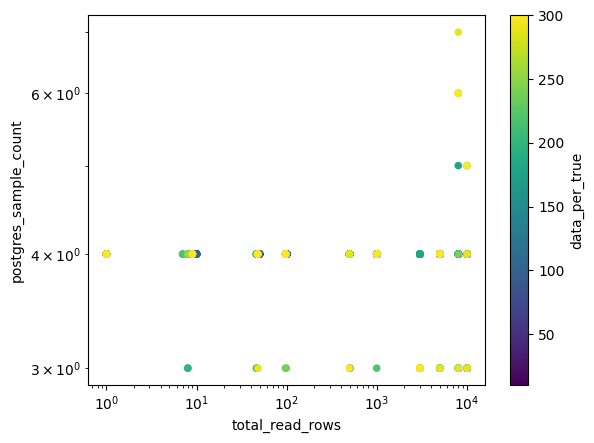

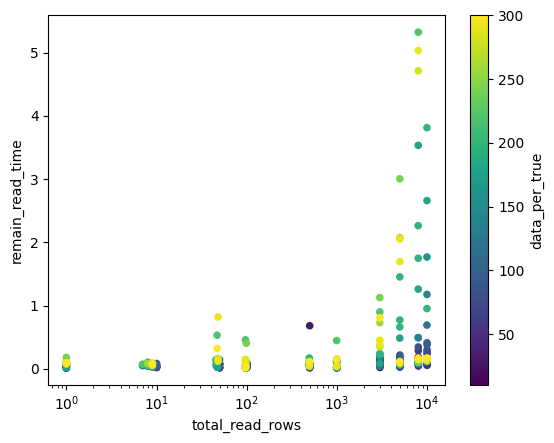

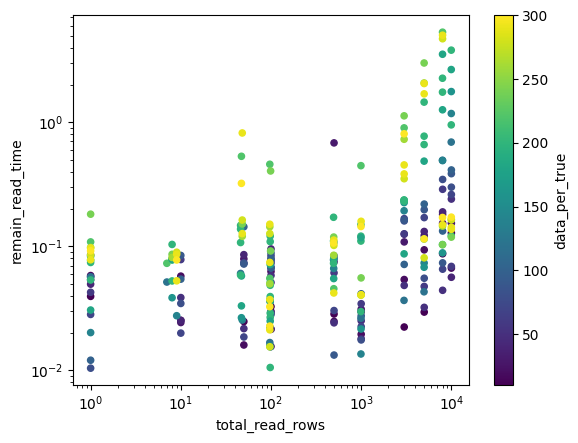

In [16]:
for i, col in enumerate(read.columns):
    ax = read.plot.scatter(x='total_read_rows', y=col,c='data_per_true',colormap='viridis')
    ax.set_xscale('log')
    ax1 = read.plot.scatter(x='total_read_rows', y=col,c='data_per_true',colormap='viridis')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

## subplots

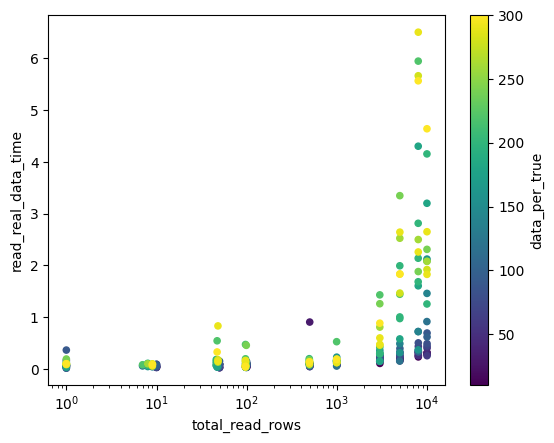

In [17]:
ax = read.plot.scatter(x='total_read_rows', y='read_real_data_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

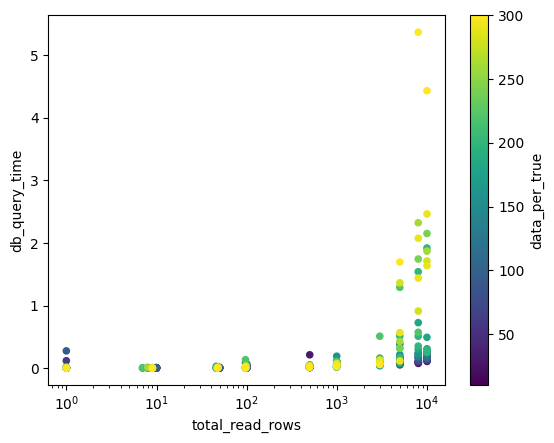

In [18]:
ax = read.plot.scatter(x='total_read_rows', y='db_query_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

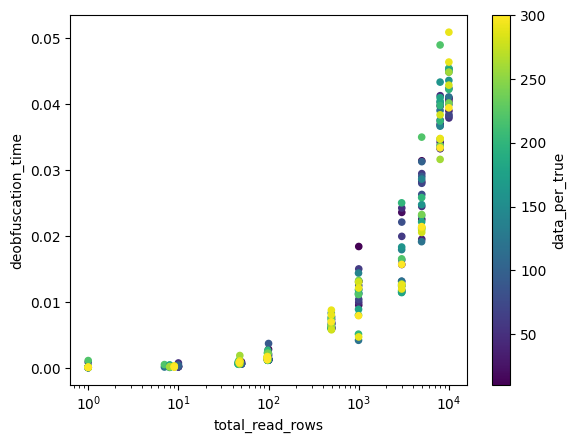

In [19]:
ax = read.plot.scatter(x='total_read_rows', y='deobfuscation_time',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

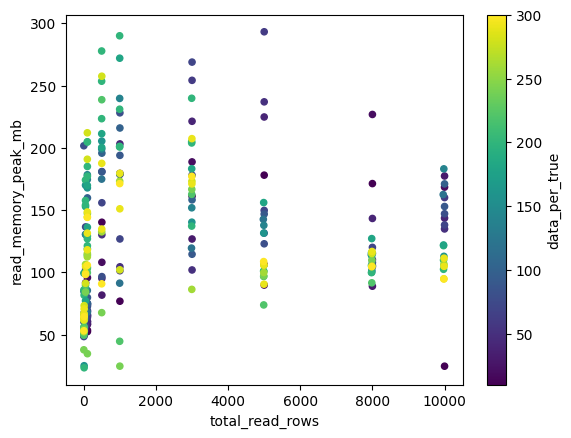

In [20]:
ax = read.plot.scatter(x='total_read_rows', y='read_memory_peak_mb',c='data_per_true',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')

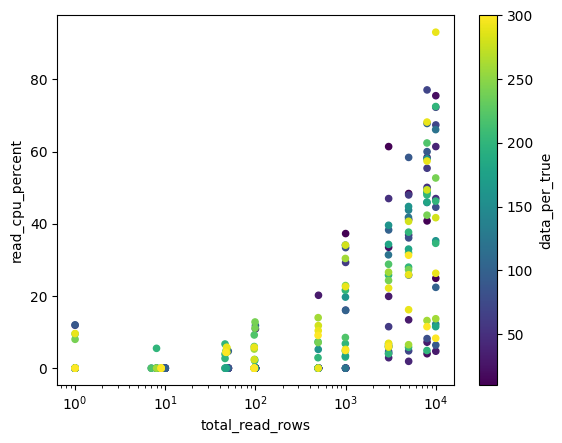

In [21]:
ax = read.plot.scatter(x='total_read_rows', y='read_cpu_percent',c='data_per_true',colormap='viridis')
ax.set_xscale('log')
#ax.set_yscale('log')

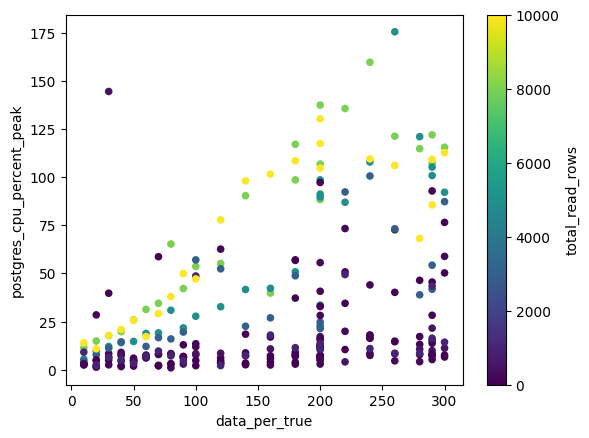

In [22]:
ax = read.plot.scatter(x='data_per_true', y='postgres_cpu_percent_peak',c='total_read_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')

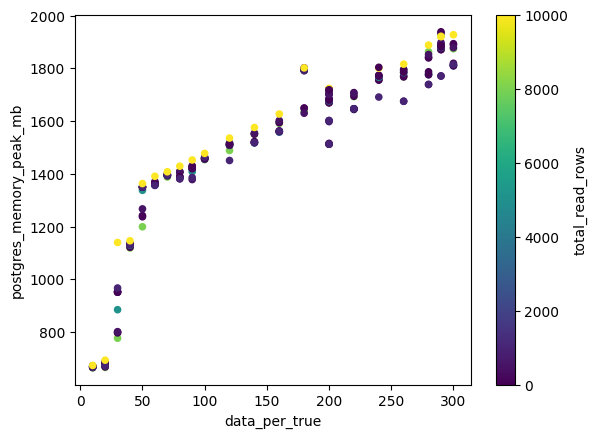

In [23]:
ax = read.plot.scatter(x='data_per_true', y='postgres_memory_peak_mb',c='total_read_rows',colormap='viridis')
#ax.set_xscale('log')
#ax.set_yscale('log')